In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
gdf_dxf = gpd.read_file('GIS/bases-DXF/TABOAO-EIXOS-PROSABS.dxf', encoding='ANSI_1252')

In [3]:
bairro = 'TABOAO'

In [4]:
# gdf_dxf2 = gpd.read_file('GIS/bases-DXF/Bairro dos Casa.dxf', encoding='ANSI_1252')

In [5]:
# gdf_dxf2.loc[gdf_dxf2.Layer == 'MCT - PASSAGEM SANTOS DIAS DA SILVA', 'Layer'] = 'PASSAGEM SANTOS DIAS DA SILVA - DJI_0042'

In [6]:
gdf_dxf

,Layer,PaperSpace,SubClasses,Linetype,EntityHandle,Text,geometry
0,MCT - AVENIDA DO TABOÃO,None,AcDbEntity:AcDbCircle:AcDbArc,None,6F,None,"LINESTRING Z (338116.387 7383886.624 0.000, 33..."
1,MCT - AVENIDA DO TABOÃO,None,AcDbEntity:AcDbCircle:AcDbArc,None,70,None,"LINESTRING Z (338066.333 7383853.032 0.000, 33..."
2,MCT - AVENIDA DO TABOÃO,None,AcDbEntity:AcDbLine,None,71,None,"LINESTRING Z (338066.333 7383853.032 0.000, 33..."
3,MCT - AVENIDA DO TABOÃO,None,AcDbEntity:AcDbLine,None,72,None,"LINESTRING Z (337988.850 7383736.138 0.000, 33..."
4,MCT - AVENIDA DO TABOÃO,None,AcDbEntity:AcDbLine,None,73,None,"LINESTRING Z (337910.499 7383601.021 0.000, 33..."
...,...,...,...,...,...,...,...
158,RUA ALMEIDA TAMANDARÃ - 21_01_2021 - TAB71,None,AcDbEntity:AcDbCircle:AcDbArc,None,2D6,None,"LINESTRING Z (336866.043 7382272.672 0.000, 33..."
159,MCT - RUA RANIERI MAZZILLI,None,AcDbEntity:AcDb2dPolyline,None,2D8,None,"LINESTRING Z (337216.418 7382578.115 0.000, 33..."
160,MCT - RUA FÃBIO DA SILVA PRADO,None,AcDbEntity:AcDb2dPolyline,None,2DD,None,"LINESTRING Z (337126.758 7382734.183 0.000, 33..."
161,RUA DR. FRANCISCO DA SILVA PRADO - 21_01_2021 ...,None,AcDbEntity:AcDb2dPolyline,None,2E2,None,"LINESTRING Z (337037.205 7382639.563 0.000, 33..."


In [7]:
# gdf_dxf = gpd.GeoDataFrame(pd.concat([gdf_dxf, gdf_dxf2]).reset_index().drop('index', axis=1))

In [8]:
# gdf_dxf.Layer.to_list()

<AxesSubplot:>

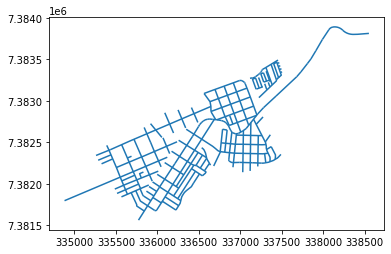

In [9]:
gdf_dxf.plot()

In [10]:
gdf_dxf['Layer'] = gdf_dxf.Layer.str.encode(encoding='raw_unicode_escape').str.decode(encoding='utf-8').str.replace('!', '1')

In [11]:
gdf_dxf['Layer'] = gdf_dxf.Layer.str.replace('MCT -', '')

In [12]:
gdf_dxf['lista'] = gdf_dxf.Layer.str.split(' - ')

In [13]:
gdf_dxf['DJI'] = gdf_dxf.Layer.str.findall('TAB[0-9]{1,3}')

In [14]:
gdf_dxf.DJI

0            []
1            []
2            []
3            []
4            []
         ...   
158     [TAB71]
159          []
160          []
161     [TAB73]
162    [TAB104]
Name: DJI, Length: 163, dtype: object

In [15]:
# gdf_dxf['etapa'] = gdf_dxf.Layer.str.extract('(ETAPA [0-9]{1,2})')

In [16]:
gdf_dxf['data_voo'] = gdf_dxf.Layer.str.extract('([0-9]{1,2}_[0-9]{2}_[0-9]{2})')

In [17]:
gdf_dxf['logradouro'] = gdf_dxf.lista.apply(lambda x: x[0])

In [18]:
gdf_dxf.loc[gdf_dxf['data_voo'].isna(), 'Layer'].to_list()

[' AVENIDA DO TABOÃO',
 ' AVENIDA DO TABOÃO',
 ' AVENIDA DO TABOÃO',
 ' AVENIDA DO TABOÃO',
 ' AVENIDA DO TABOÃO',
 ' AVENIDA DO TABOÃO',
 ' AVENIDA DO TABOÃO',
 ' AVENIDA DO TABOÃO',
 ' AVENIDA DO TABOÃO',
 ' AVENIDA DO TABOÃO',
 ' AVENIDA DO TABOÃO',
 ' AVENIDA DO TABOÃO',
 ' AVENIDA DO TABOÃO',
 ' AVENIDA DO TABOÃO',
 ' AVENIDA DO TABOÃO',
 ' AVENIDA DO TABOÃO',
 ' AVENIDA DO TABOÃO',
 ' AVENIDA DO TABOÃO',
 ' AVENIDA DO TABOÃO',
 ' AVENIDA DO TABOÃO',
 ' AVENIDA DO TABOÃO',
 ' AVENIDA DO TABOÃO',
 ' AVENIDA DO TABOÃO',
 ' AVENIDA DO TABOÃO',
 ' AVENIDA DO TABOÃO',
 ' AVENIDA DO TABOÃO',
 ' AVENIDA DO TABOÃO',
 ' AVENIDA DO TABOÃO',
 ' AVENIDA DO TABOÃO',
 ' AVENIDA DO TABOÃO',
 ' AVENIDA DO TABOÃO',
 ' AVENIDA DO TABOÃO',
 ' AVENIDA DO TABOÃO',
 ' AVENIDA DO TABOÃO',
 ' AVENIDA DO TABOÃO',
 ' AVENIDA DO TABOÃO',
 ' AVENIDA DO TABOÃO',
 ' AVENIDA DO TABOÃO',
 ' RUA LUIZ FERIANI',
 ' RUA AFONSO CÉLSO FIGUEIREDO',
 ' RUA TASUKE UEMATSU',
 ' RUA AMÉRICO MOLARI',
 ' RUA HORÁCIO DE CARVA

In [19]:
gdf_dxf.Layer.str.split('([0-9]{1,2}_[0-9]{2}_[0-9]{2})|(TAB[0-9]{1,3})', expand=True)

,0,1,2,3,4,5,6,7,8,9
0,AVENIDA DO TABOÃO,None,None,None,None,None,None,None,None,None
1,AVENIDA DO TABOÃO,None,None,None,None,None,None,None,None,None
2,AVENIDA DO TABOÃO,None,None,None,None,None,None,None,None,None
3,AVENIDA DO TABOÃO,None,None,None,None,None,None,None,None,None
4,AVENIDA DO TABOÃO,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
158,RUA ALMEIDA TAMANDARÉ -,21_01_20,None,21 -,None,TAB71,,None,None,None
159,RUA RANIERI MAZZILLI,None,None,None,None,None,None,None,None,None
160,RUA FÁBIO DA SILVA PRADO,None,None,None,None,None,None,None,None,None
161,RUA DR. FRANCISCO DA SILVA PRADO -,21_01_20,None,21 -,None,TAB73,,None,None,None


In [20]:
gdf_dxf.Layer.str.split('([0-9]{1,2}_[0-9]{2}_[0-9]{2})|(TAB[0-9]{1,3})', expand=True)[3].unique().tolist()

[None, '21 - ']

In [21]:
etapas = {
    '21 - ':'etapa_00', 
    '':'etapa_00',
    '21- ':'etapa_00',
    '21 -':'etapa_00'
}

In [22]:
len(etapas)

4

In [23]:
gdf_dxf.Layer.str.split('([0-9]{1,2}_[0-9]{2}_[0-9]{2})|(TAB[0-9]{1,3})', expand=True)[3].map(etapas)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
158    etapa_00
159         NaN
160         NaN
161    etapa_00
162    etapa_00
Name: 3, Length: 163, dtype: object

In [24]:
gdf_dxf.loc[:, 'etapa'] = gdf_dxf.Layer.str.split('([0-9]{1,2}_[0-9]{2}_[0-9]{2})|(TAB[0-9]{1,3})', expand=True)[3].map(etapas)

In [25]:
gdf_dxf.loc[:, 'etapa']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
158    etapa_00
159         NaN
160         NaN
161    etapa_00
162    etapa_00
Name: etapa, Length: 163, dtype: object

In [26]:
gdf_dxf

,Layer,PaperSpace,SubClasses,Linetype,EntityHandle,Text,geometry,lista,DJI,data_voo,logradouro,etapa
0,AVENIDA DO TABOÃO,None,AcDbEntity:AcDbCircle:AcDbArc,None,6F,None,"LINESTRING Z (338116.387 7383886.624 0.000, 33...",[ AVENIDA DO TABOÃO],[],NaN,AVENIDA DO TABOÃO,NaN
1,AVENIDA DO TABOÃO,None,AcDbEntity:AcDbCircle:AcDbArc,None,70,None,"LINESTRING Z (338066.333 7383853.032 0.000, 33...",[ AVENIDA DO TABOÃO],[],NaN,AVENIDA DO TABOÃO,NaN
2,AVENIDA DO TABOÃO,None,AcDbEntity:AcDbLine,None,71,None,"LINESTRING Z (338066.333 7383853.032 0.000, 33...",[ AVENIDA DO TABOÃO],[],NaN,AVENIDA DO TABOÃO,NaN
3,AVENIDA DO TABOÃO,None,AcDbEntity:AcDbLine,None,72,None,"LINESTRING Z (337988.850 7383736.138 0.000, 33...",[ AVENIDA DO TABOÃO],[],NaN,AVENIDA DO TABOÃO,NaN
4,AVENIDA DO TABOÃO,None,AcDbEntity:AcDbLine,None,73,None,"LINESTRING Z (337910.499 7383601.021 0.000, 33...",[ AVENIDA DO TABOÃO],[],NaN,AVENIDA DO TABOÃO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
158,RUA ALMEIDA TAMANDARÉ - 21_01_2021 - TAB71,None,AcDbEntity:AcDbCircle:AcDbArc,None,2D6,None,"LINESTRING Z (336866.043 7382272.672 0.000, 33...","[RUA ALMEIDA TAMANDARÉ, 21_01_2021, TAB71]",[TAB71],21_01_20,RUA ALMEIDA TAMANDARÉ,etapa_00
159,RUA RANIERI MAZZILLI,None,AcDbEntity:AcDb2dPolyline,None,2D8,None,"LINESTRING Z (337216.418 7382578.115 0.000, 33...",[ RUA RANIERI MAZZILLI],[],NaN,RUA RANIERI MAZZILLI,NaN
160,RUA FÁBIO DA SILVA PRADO,None,AcDbEntity:AcDb2dPolyline,None,2DD,None,"LINESTRING Z (337126.758 7382734.183 0.000, 33...",[ RUA FÁBIO DA SILVA PRADO],[],NaN,RUA FÁBIO DA SILVA PRADO,NaN
161,RUA DR. FRANCISCO DA SILVA PRADO - 21_01_2021 ...,None,AcDbEntity:AcDb2dPolyline,None,2E2,None,"LINESTRING Z (337037.205 7382639.563 0.000, 33...","[RUA DR. FRANCISCO DA SILVA PRADO, 21_01_2021,...",[TAB73],21_01_20,RUA DR. FRANCISCO DA SILVA PRADO,etapa_00


In [27]:
pd_videos = pd.DataFrame(list(map(lambda x: 
         list(map(lambda y: y + '.MOV', x))
         , gdf_dxf.DJI))).add_prefix('Video_')

In [28]:
pd_videos

,Video_0,Video_1
0,None,None
1,None,None
2,None,None
3,None,None
4,None,None
...,...,...
158,TAB71.MOV,None
159,None,None
160,None,None
161,TAB73.MOV,None


In [29]:
gdf_dxf = gdf_dxf.merge(pd_videos, left_index=True, right_index=True)

In [30]:
gdf_dxf.columns

Index(['Layer', 'PaperSpace', 'SubClasses', 'Linetype', 'EntityHandle', 'Text',
       'geometry', 'lista', 'DJI', 'data_voo', 'logradouro', 'etapa',
       'Video_0', 'Video_1'],
      dtype='object')

In [31]:
gdf_dxf.loc[gdf_dxf.etapa.isna(), 'etapa'] = ''

In [32]:
gdf_dxf.etapa = gdf_dxf.etapa.str.replace(' ', '_')

In [33]:
gdf_dxf.loc[gdf_dxf.etapa != '', 'etapa'] += '/'

In [34]:
gdf_dxf.loc[~gdf_dxf.data_voo.isna(), 'data_voo'] += '/'

In [35]:
for c in gdf_dxf.loc[:, gdf_dxf.columns.str.startswith('Video')].columns:
    gdf_dxf[c + '_path'] = 'videos/' + bairro.lower().replace('-', '_') + '/' + gdf_dxf[c]

In [36]:
gdf_dxf = gdf_dxf.dissolve(by=['Layer'], aggfunc='first').reset_index()

In [37]:
gdf_dxf.crs = 'epsg:31983'

In [38]:
gdf_dxf

,Layer,geometry,PaperSpace,SubClasses,Linetype,EntityHandle,Text,lista,DJI,data_voo,logradouro,etapa,Video_0,Video_1,Video_0_path,Video_1_path
0,AVENIDA DO TABOÃO,MULTILINESTRING Z ((338116.387 7383886.624 0.0...,None,AcDbEntity:AcDbCircle:AcDbArc,None,6F,None,[ AVENIDA DO TABOÃO],[],None,AVENIDA DO TABOÃO,,None,None,None,None
1,RUA AFONSO CÉLSO FIGUEIREDO,"LINESTRING Z (336840.596 7382644.424 0.000, 33...",None,AcDbEntity:AcDb2dPolyline,None,1E9,None,[ RUA AFONSO CÉLSO FIGUEIREDO],[],None,RUA AFONSO CÉLSO FIGUEIREDO,,None,None,None,None
2,RUA AMÉRICO MOLARI,"LINESTRING Z (337316.674 7382410.779 0.000, 33...",None,AcDbEntity:AcDb2dPolyline,None,20C,None,[ RUA AMÉRICO MOLARI],[],None,RUA AMÉRICO MOLARI,,None,None,None,None
3,RUA COSME DE FARIAS,"LINESTRING Z (337292.745 7382360.630 0.000, 33...",None,AcDbEntity:AcDb2dPolyline,None,22B,None,[ RUA COSME DE FARIAS],[],None,RUA COSME DE FARIAS,,None,None,None,None
4,RUA FÁBIO DA SILVA PRADO,"LINESTRING Z (337126.758 7382734.183 0.000, 33...",None,AcDbEntity:AcDb2dPolyline,None,2DD,None,[ RUA FÁBIO DA SILVA PRADO],[],None,RUA FÁBIO DA SILVA PRADO,,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,VIELA 07 - 20_01_2021 - TAB40,"LINESTRING Z (337434.127 7383252.275 0.000, 33...",None,AcDbEntity:AcDb2dPolyline,None,96,None,"[VIELA 07, 20_01_2021, TAB40]",[TAB40],20_01_20/,VIELA 07,etapa_00/,TAB40.MOV,None,videos/taboao/TAB40.MOV,None
85,VIELA 08 - 20_01_2021 - TAB36,"LINESTRING Z (337444.042 7383447.789 0.000, 33...",None,AcDbEntity:AcDb2dPolyline,None,16F,None,"[VIELA 08, 20_01_2021, TAB36]",[TAB36],20_01_20/,VIELA 08,etapa_00/,TAB36.MOV,None,videos/taboao/TAB36.MOV,None
86,VIELA 09 - 20_01_2021 - TAB37,"LINESTRING Z (337456.812 7383411.336 0.000, 33...",None,AcDbEntity:AcDb2dPolyline,None,16A,None,"[VIELA 09, 20_01_2021, TAB37]",[TAB37],20_01_20/,VIELA 09,etapa_00/,TAB37.MOV,None,videos/taboao/TAB37.MOV,None
87,VIELA 10 - 20_01_2021 - TAB38,"LINESTRING Z (337469.716 7383374.503 0.000, 33...",None,AcDbEntity:AcDb2dPolyline,None,165,None,"[VIELA 10, 20_01_2021, TAB38]",[TAB38],20_01_20/,VIELA 10,etapa_00/,TAB38.MOV,None,videos/taboao/TAB38.MOV,None


In [39]:
gdf_dxf.drop(['Layer', 'PaperSpace', 'SubClasses', 'Linetype', 'EntityHandle', 'Text', 'DJI', 'lista'], axis=1)

,geometry,data_voo,logradouro,etapa,Video_0,Video_1,Video_0_path,Video_1_path
0,MULTILINESTRING Z ((338116.387 7383886.624 0.0...,None,AVENIDA DO TABOÃO,,None,None,None,None
1,"LINESTRING Z (336840.596 7382644.424 0.000, 33...",None,RUA AFONSO CÉLSO FIGUEIREDO,,None,None,None,None
2,"LINESTRING Z (337316.674 7382410.779 0.000, 33...",None,RUA AMÉRICO MOLARI,,None,None,None,None
3,"LINESTRING Z (337292.745 7382360.630 0.000, 33...",None,RUA COSME DE FARIAS,,None,None,None,None
4,"LINESTRING Z (337126.758 7382734.183 0.000, 33...",None,RUA FÁBIO DA SILVA PRADO,,None,None,None,None
...,...,...,...,...,...,...,...,...
84,"LINESTRING Z (337434.127 7383252.275 0.000, 33...",20_01_20/,VIELA 07,etapa_00/,TAB40.MOV,None,videos/taboao/TAB40.MOV,None
85,"LINESTRING Z (337444.042 7383447.789 0.000, 33...",20_01_20/,VIELA 08,etapa_00/,TAB36.MOV,None,videos/taboao/TAB36.MOV,None
86,"LINESTRING Z (337456.812 7383411.336 0.000, 33...",20_01_20/,VIELA 09,etapa_00/,TAB37.MOV,None,videos/taboao/TAB37.MOV,None
87,"LINESTRING Z (337469.716 7383374.503 0.000, 33...",20_01_20/,VIELA 10,etapa_00/,TAB38.MOV,None,videos/taboao/TAB38.MOV,None


In [40]:
gdf_dxf.drop(['Layer', 'PaperSpace', 'SubClasses', 'Linetype', 'EntityHandle', 'Text', 'DJI', 'lista', 'etapa', 'data_voo', 'Video_0', 'Video_1'], axis=1).to_file(f'./videos/ruas-videos-{bairro}-PROSAB.gpkg', driver='GPKG')

In [41]:
gdf_dxf.to_crs('EPSG:4326').drop(['Layer', 'PaperSpace', 'SubClasses', 'Linetype', 'EntityHandle', 'Text', 'DJI', 'lista', 'etapa', 'data_voo', 'Video_0', 'Video_1'], axis=1).to_file(f'./videos/ruas-videos-{bairro}-PROSAB.geojson', driver='GeoJSON')

In [42]:
gdf_dxf.dtypes

Layer             object
geometry        geometry
PaperSpace        object
SubClasses        object
Linetype          object
EntityHandle      object
Text              object
lista             object
DJI               object
data_voo          object
logradouro        object
etapa             object
Video_0           object
Video_1           object
Video_0_path      object
Video_1_path      object
dtype: object

In [43]:
gdf_dxf.Video_0.isna().value_counts()

False    75
True     14
Name: Video_0, dtype: int64